In [1]:
# Importing required libraries
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced data visualization
import matplotlib.pyplot as plt  # For plotting graphs and charts
from sklearn.cluster import KMeans  # For implementing K-Means clustering
import warnings  # To handle or suppress warnings

# Suppressing warnings to avoid unnecessary output
warnings.filterwarnings('ignore')



In [2]:
# Reading the dataset into a Pandas DataFrame
df = pd.read_csv("C:/Users/nosao/Downloads/Mall_Customers.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariative Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


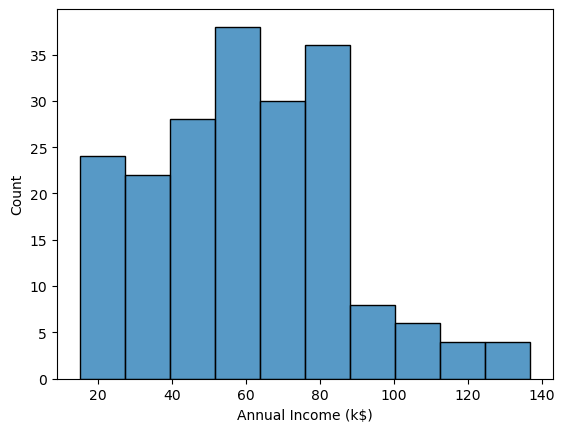

In [5]:
sns.histplot(df['Annual Income (k$)']);

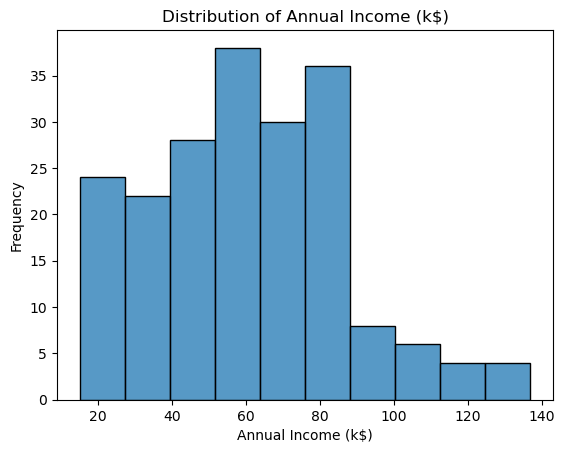

In [6]:
# Plotting a histogram to visualize the distribution of the 'Annual Income (k$)' column
sns.histplot(df['Annual Income (k$)'])

plt.title('Distribution of Annual Income (k$)')  # Title of the plot
plt.xlabel('Annual Income (k$)')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.show()  # Display the plot


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

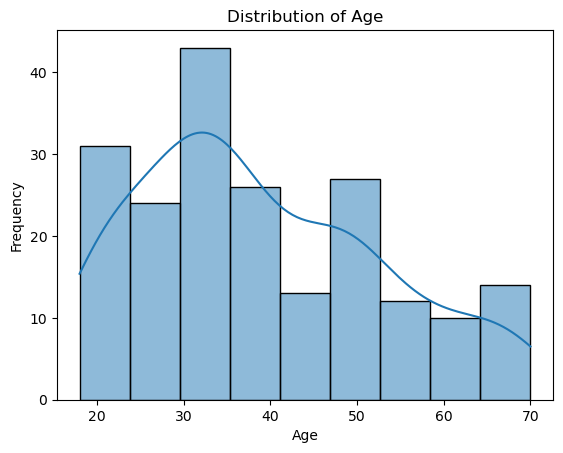

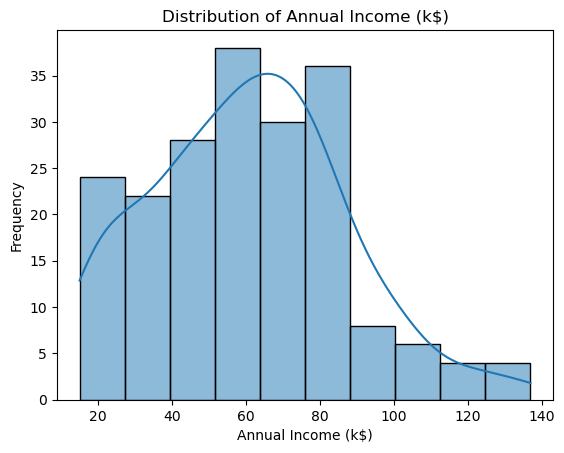

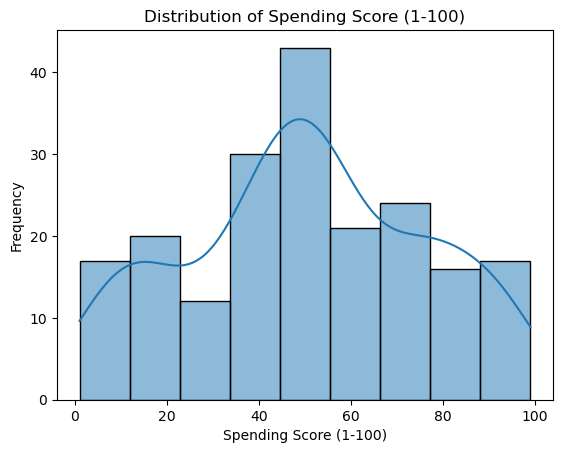

In [8]:
# List of columns to visualize
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Iterating through each column in the list to create individual plots
for col in columns:
    plt.figure()  # Create a new figure for each plot
    sns.histplot(df[col], kde=True)  # Plot histogram with a KDE (Kernel Density Estimation) curve
    plt.title(f'Distribution of {col}')  # Add a dynamic title based on the column name
    plt.xlabel(col)  # Label the x-axis with the column name
    plt.ylabel('Frequency')  # Label the y-axis as 'Frequency'
    plt.show()  # Display the plot


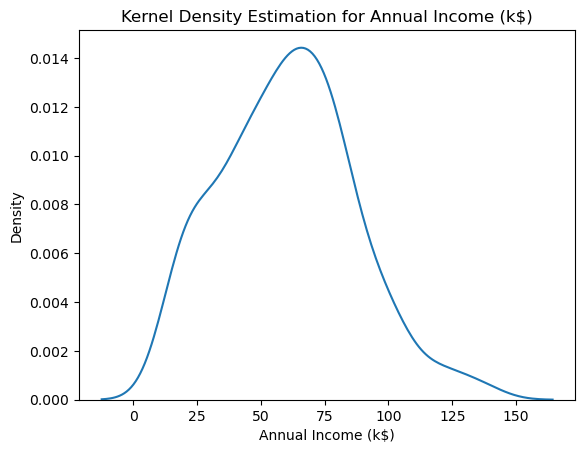

In [9]:
# Creating a Kernel Density Estimation (KDE) plot for the 'Annual Income (k$)' column
sns.kdeplot(df['Annual Income (k$)'])

plt.title('Kernel Density Estimation for Annual Income (k$)')  # Title of the plot
plt.xlabel('Annual Income (k$)')  # Label for the x-axis
plt.ylabel('Density')  # Label for the y-axis

# Displaying the plot
plt.show()


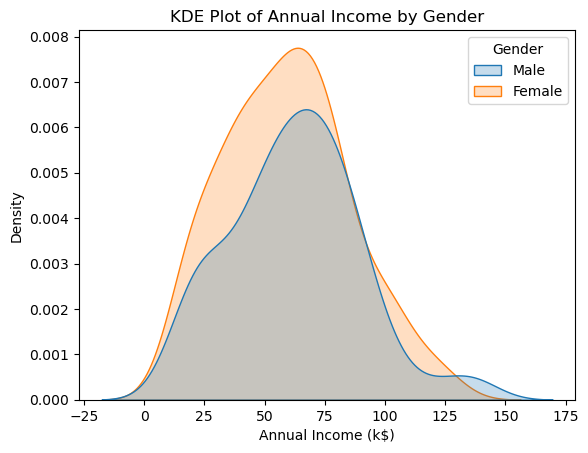

In [10]:
# Creating a Kernel Density Estimation (KDE) plot for 'Annual Income (k$)'
# The plot is grouped by the 'Gender' column, allowing a comparison between genders
# The 'fill=True' argument adds shaded areas under the KDE curves for better visualization
sns.kdeplot(data=df, x='Annual Income (k$)', hue='Gender', fill=True)

plt.title('KDE Plot of Annual Income by Gender')  # Title of the plot

plt.xlabel('Annual Income (k$)')  # Label for the x-axis

plt.ylabel('Density')  # Label for the y-axis

# Displaying the plot
plt.show()


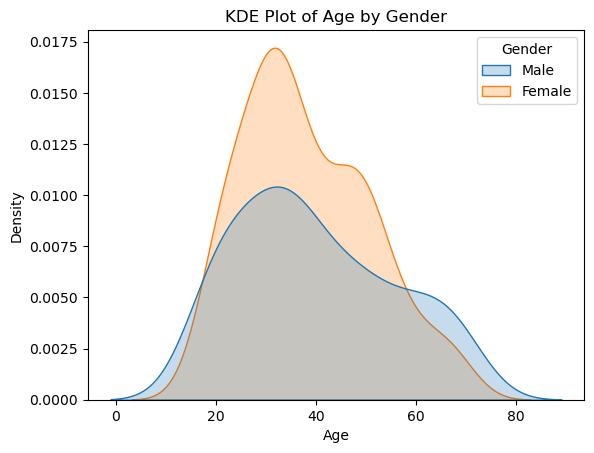

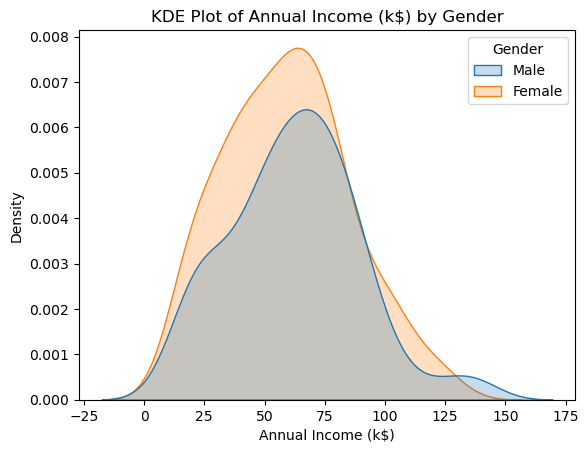

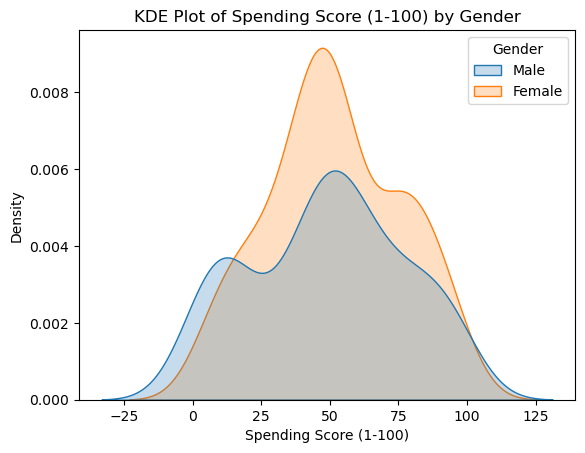

In [11]:
# List of columns to create KDE plots for
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Iterating through each column in the list to generate individual KDE plots
for col in columns:
    plt.figure()  # Create a new figure for each plot
    # Generate a KDE plot for the specified column, grouped by 'Gender'
    sns.kdeplot(data=df, x=col, hue='Gender', fill=True)
    
    # Labeling the y-axis as 'Density' for all plots
    plt.ylabel('Density')  
    
    # Adding a dynamic title to specify the feature being analyzed in the plot
    plt.title(f'KDE Plot of {col} by Gender')
    
    # Displaying the plot
    plt.show()

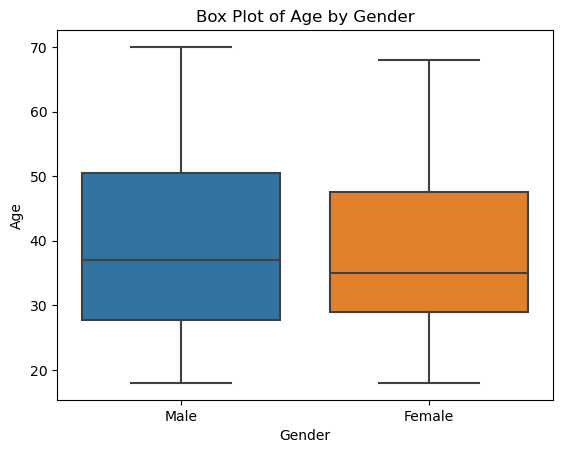

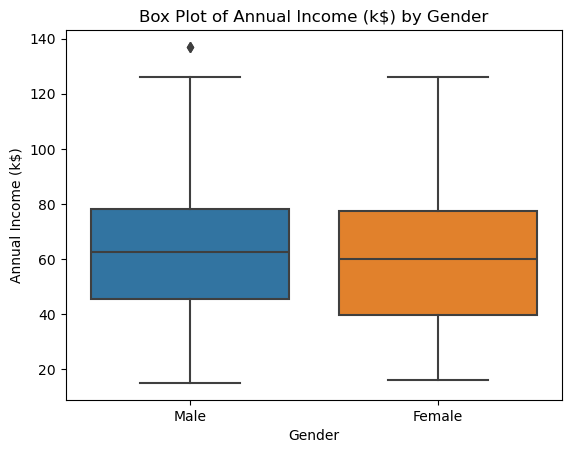

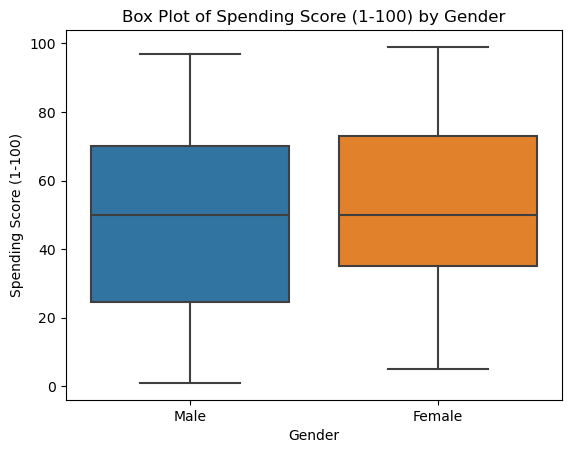

In [12]:
# List of columns to create boxplots for
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Iterating through each column in the list to generate individual boxplots
for col in columns:
    plt.figure()  # Create a new figure for each plot
    # Generate a boxplot to compare the distribution of the column by 'Gender'
    sns.boxplot(data=df, x='Gender', y=col)
    
    # Labeling the y-axis with the column name to indicate the feature being analyzed
    plt.ylabel(col)
    
    # Adding a dynamic title to specify the feature being analyzed and its comparison by gender
    plt.title(f'Box Plot of {col} by Gender')
    
    # Displaying the plot
    plt.show()


In [13]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

# Bivariate Analysis

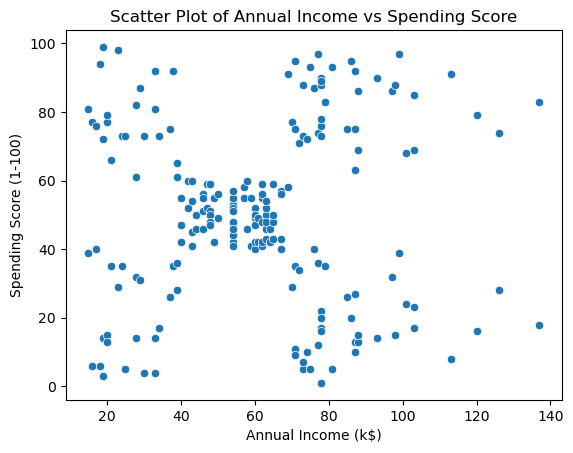

In [15]:
# Creating a scatter plot to visualize the relationship between 'Annual Income (k$)' and 'Spending Score (1-100)'
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

# Adding a title to describe the purpose of the plot
plt.title('Scatter Plot of Annual Income vs Spending Score')  # Title of the plot

plt.xlabel('Annual Income (k$)')  # Label for the x-axis

# Labeling the y-axis with the feature being analyzed
plt.ylabel('Spending Score (1-100)')  # Label for the y-axis

# Displaying the plot
plt.show()


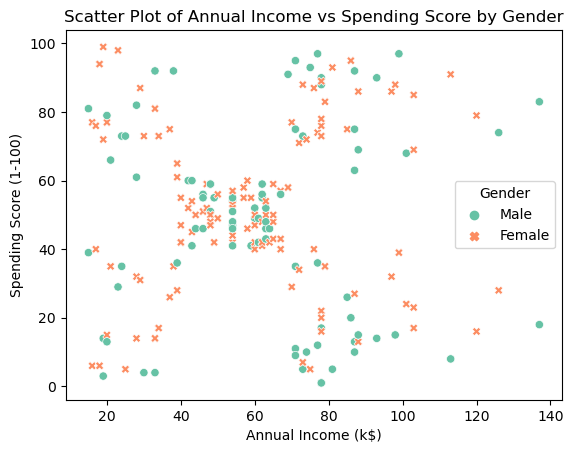

In [16]:
# Scatter plot
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',        # Differentiate points by Gender
    style='Gender',      # Differentiate marker style by Gender
    palette='Set2'       # Use a color palette for better visuals
)

# Add labels and title
plt.title('Scatter Plot of Annual Income vs Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')  # Add legend with title
plt.show() 

In [17]:
#drop data columns
df = df.drop('CustomerID', axis=1, errors='ignore')

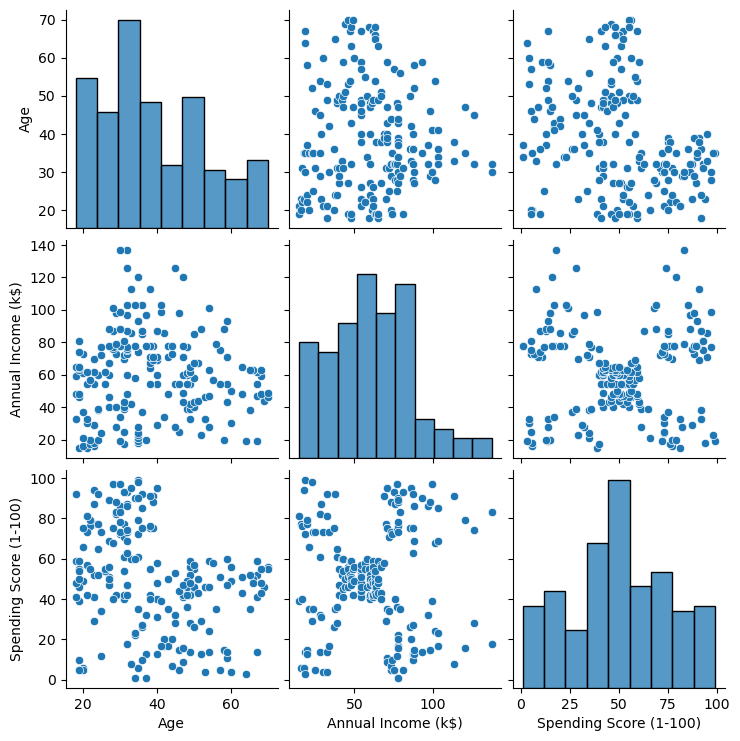

In [18]:
sns.pairplot(df) # Creating a pair plot to visualize pairwise relationships between numerical columns in the DataFrame

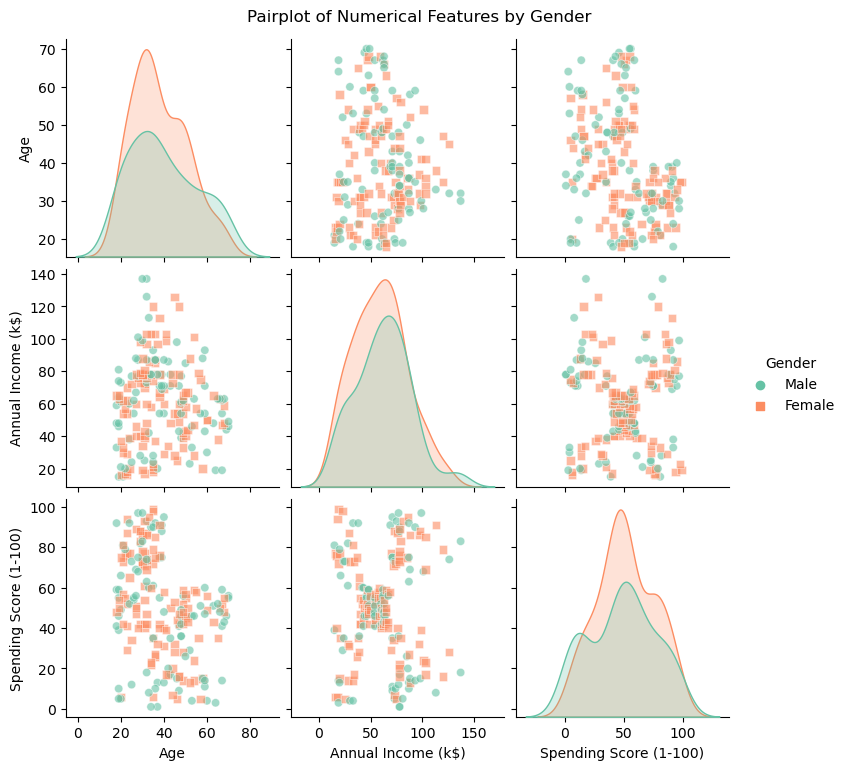

In [19]:
# Create a pairplot with enhancements
sns.pairplot(
    data=df,
    hue='Gender',          # Differentiates points by Gender
    palette='Set2',        # Adds a color palette for clarity
    diag_kind='kde',       # Use KDE plots on the diagonal
    markers=['o', 's'],    # Customize markers for each Gender
    plot_kws={'alpha': 0.6}  # Adjust transparency for clarity
)

# Add a title (requires tight layout adjustment)
plt.suptitle('Pairplot of Numerical Features by Gender', y=1.02)
plt.show()

In [20]:
# Grouping the DataFrame by the 'Gender' column
# Calculating the mean for the specified columns: 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()



,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [21]:
# Selecting only numerical columns from the DataFrame
# `select_dtypes(include=['number'])` filters out non-numerical columns
numerical_data = df.select_dtypes(include=['number'])

# Calculating the correlation matrix for numerical columns
# The correlation matrix shows the pairwise correlation coefficients between numerical features
correlation_matrix = numerical_data.corr()

# Displaying the correlation matrix
print(correlation_matrix)


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [22]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [23]:
#sns.heatmap(df.corr(numeric), annot=True,cmap='coolwarm')

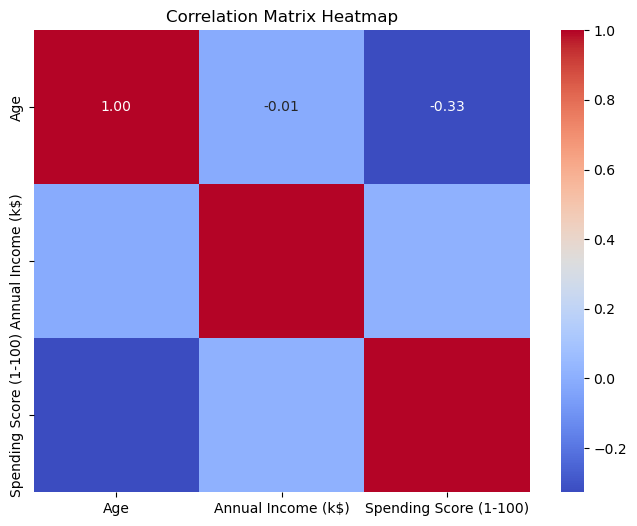

In [24]:
# Select only numerical columns
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Clustering - Univariate, Bivariate, Multivariate

I will initiate the K-Means algorithm and begin clustering. I will be doing a Univariate, Bivaiate and Multivariate clustering. Also some statistical analysis around these clusters will be done to get some insights on the customer segmentation.

In [61]:
# Initializing the KMeans clustering algorithm
# `n_clusters=6` specifies that the dataset will be divided into 6 clusters
clustering1 = KMeans(n_clusters=6)

In [62]:
# Fitting the KMeans clustering model to the 'Annual Income (k$)' column
# The KMeans algorithm will group the data points based on their annual income
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [64]:
# Accessing the cluster labels (which cluster each data point belongs to)
clustering1.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2,
       2, 2])

In [65]:
# Adding a new column to the DataFrame to store the cluster assignments
# The 'Income Cluster' column will indicate which cluster each data point belongs to
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,2
1,Male,21,15,81,4,4
2,Female,20,16,6,4,2
3,Female,23,16,77,4,4
4,Female,31,17,40,4,2


In [67]:
# Counting the number of occurrences of each cluster label in the 'Income Cluster' column
# This will show how many data points belong to each cluster
df['Income Cluster'].value_counts()


Income Cluster
0    46
3    44
1    42
4    32
5    28
2     8
Name: count, dtype: int64

# Elbow Method

The goal is to cluster data points based on the feature 'Annual Income (k$)' and find the optimal
number of clusters by evaluating the sum of squared
distances (inertia) of the data points from their assigned cluster centroids.

In [70]:
# Accessing the inertia of the KMeans model after fitting
# Inertia represents the sum of squared distances of samples to their closest cluster center
clustering1.inertia_

5081.484660267269

In [74]:
# Initializing an empty list to store inertia scores for different numbers of clusters
inertia_scores = []

# Iterating through a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Initializing a KMeans model with the current number of clusters
    kmeans = KMeans(n_clusters=i)
    
    # Fitting the KMeans model to the 'Annual Income (k$)' column
    kmeans.fit(df[['Annual Income (k$)']])
    
    # Appending the inertia value of the current model to the list
    inertia_scores.append(kmeans.inertia_)

In [75]:
inertia_scores

[137277.28000000003,
 48660.88888888888,
 23517.33093093093,
 13278.112713472487,
 8481.496190476191,
 5050.9047619047615,
 3931.988095238095,
 2862.2504273504273,
 2168.478715728716,
 1737.1612554112553]

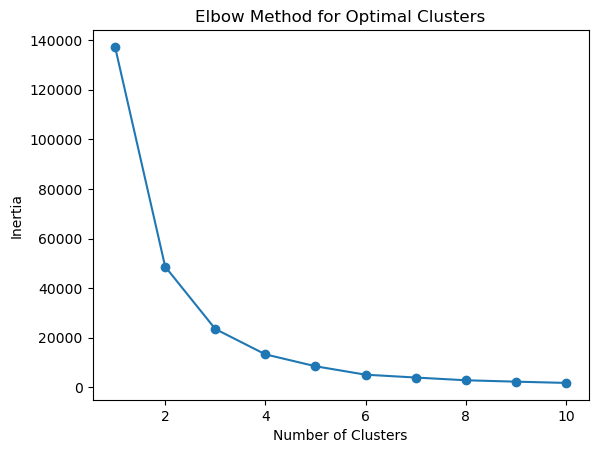

In [33]:
#plotting the inertia score list
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [34]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [78]:
# Grouping the DataFrame by the 'Income Cluster' column
# Calculating the mean values for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,35.956522,74.391304,50.913043
1,43.000000,42.238095,50.666667
2,36.500000,124.000000,49.625000
3,41.613636,59.454545,49.045455
4,34.906250,22.000000,49.656250
5,38.214286,93.000000,50.928571


# Bivariante Clustering

In [85]:
# Initializing a new KMeans clustering model with 5 clusters
clustering2 = KMeans(n_clusters=5)

# Fitting the KMeans model to the 'Annual Income (k$)' and 'Spending Score (1-100)' columns
# The model will group the data points based on these two features
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Adding a new column to the DataFrame to store the cluster assignments
# 'Spending and Income Cluster' indicates which cluster each data point belongs to
df['Spending and Income Cluster'] = clustering2.labels_

# Displaying the first few rows of the updated DataFrame to confirm the new column
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,2
1,Male,21,15,81,4,4
2,Female,20,16,6,4,2
3,Female,23,16,77,4,4
4,Female,31,17,40,4,2


In [86]:
# Initializing an empty list to store inertia scores for different numbers of clusters
inertia_scores2 = []

# Iterating through a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Initializing a KMeans model with the current number of clusters
    kmeans2 = KMeans(n_clusters=i)
    
    # Fitting the KMeans model to the 'Annual Income (k$)' and 'Spending Score (1-100)' columns
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    
    # Appending the inertia value of the current model to the list
    inertia_scores2.append(kmeans2.inertia_)


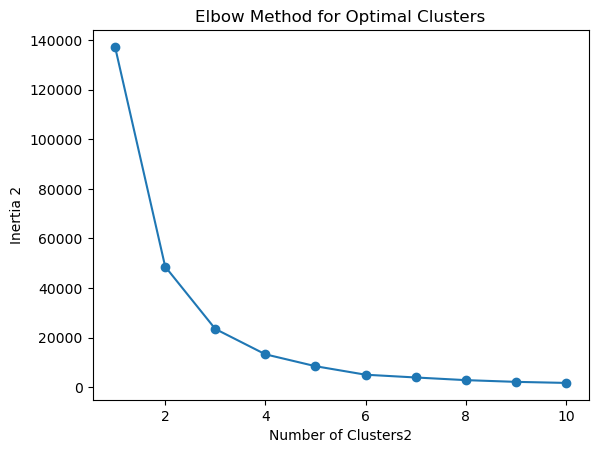

In [87]:
#plotting the inertia score list
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.xlabel('Number of Clusters2')
plt.ylabel('Inertia 2')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [39]:
#create a DataFrame from the cluster centers of the KMeans model
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

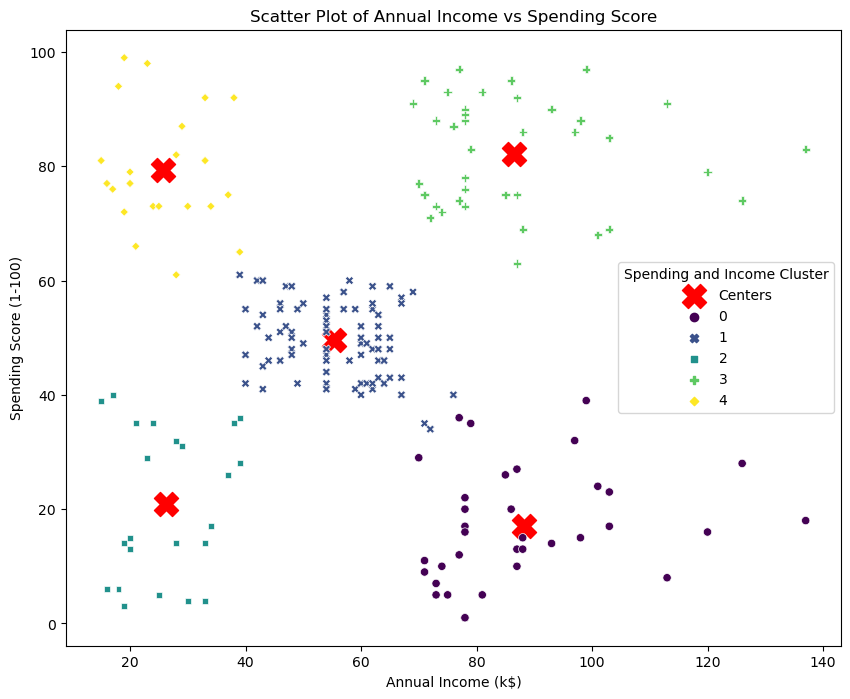

In [40]:
#Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(centers['x'], centers['y'], s=300, c='red', marker='X', label='Centers')

sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Spending and Income Cluster',  # Color points based on Income Cluster
    palette='viridis',     # Use a color palette
    style='Spending and Income Cluster' # Optionally use different styles for clusters
)

# Add labels and title
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Spending and Income Cluster')
plt.show()


In [89]:
# Creating a cross-tabulation between 'Spending and Income Cluster' and 'Gender'
# The normalize='index' argument normalizes the counts within each cluster (row-wise)
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.608696,0.391304
3,0.457143,0.542857
4,0.590909,0.409091


In [90]:
# Grouping the DataFrame by the 'Spending and Income Cluster' column
# Calculating the mean values for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)' within each cluster
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,45.217391,26.304348,20.913043
3,41.114286,88.200000,17.114286
4,25.272727,25.727273,79.363636


# Multivariate clustering

In [91]:
# Importing StandardScaler from the sklearn.preprocessing module
# StandardScaler is used to normalize or standardize data
from sklearn.preprocessing import StandardScaler

In [92]:
# Initializing the StandardScaler
# This will be used to standardize numerical features by scaling them to have a mean of 0 and a standard deviation of 1
scale = StandardScaler()

In [93]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,2
1,Male,21,15,81,4,4
2,Female,20,16,6,4,2
3,Female,23,16,77,4,4
4,Female,31,17,40,4,2


In [94]:
# Converting categorical variables into dummy/indicator variables
# `drop_first=True` drops the first category to avoid multicollinearity in the resulting dataset
# Converting the resulting dummy variables to integers using `.astype(int)`
dff = pd.get_dummies(df, drop_first=True).astype(int)

# Displaying the first few rows of the transformed DataFrame
dff.head()


,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,4,2,1
1,21,15,81,4,4,1
2,20,16,6,4,2,0
3,23,16,77,4,4,0
4,31,17,40,4,2,0


In [47]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [95]:
# Selecting specific columns from the transformed DataFrame
# Keeping only 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', and 'Gender_Male' for further analysis
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]

# Displaying the first few rows of the reduced DataFrame
dff.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [96]:
# Standardizing the selected features in the DataFrame
# Applying the StandardScaler to transform the data so that each feature has a mean of 0 and a standard deviation of 1
dff = pd.DataFrame(scale.fit_transform(dff))

# Converting the scaled data back into a DataFrame for further use
# The result is a DataFrame where all features are standardized
dff.head()


,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


In [100]:
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


In [101]:
# Initializing an empty list to store inertia scores for different numbers of clusters
inertia_scores3 = []

# Iterating through a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Initializing a KMeans model with the current number of clusters
    kmeans3 = KMeans(n_clusters=i)
    
    # Fitting the KMeans model to the standardized DataFrame
    # The data in 'dff' has already been standardized using StandardScaler
    kmeans3.fit(dff)
    
    # Appending the inertia value of the current model to the list
    inertia_scores3.append(kmeans3.inertia_)


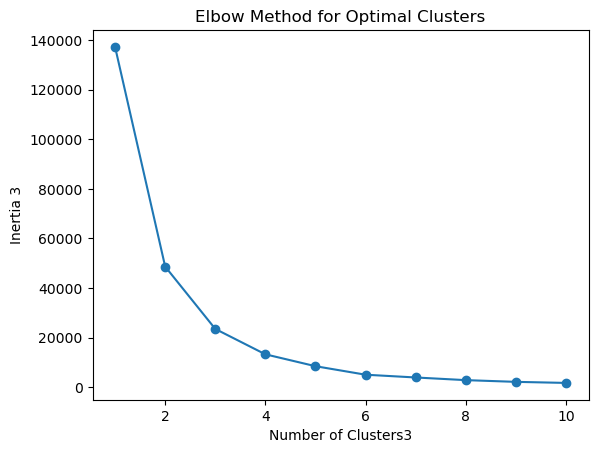

In [102]:
#plotting the inertia score list
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.xlabel('Number of Clusters3')
plt.ylabel('Inertia 3')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

In [104]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,4,2
1,Male,21,15,81,4,4
2,Female,20,16,6,4,2
3,Female,23,16,77,4,4
4,Female,31,17,40,4,2
...,...,...,...,...,...,...
195,Female,35,120,79,2,1
196,Female,45,126,28,2,3
197,Male,32,126,74,2,1
198,Male,32,137,18,2,3


In [54]:
df.to_csv('clustering.csv')